# Project GTD Dataset

## 1. Brief summary of the Data
Some necessary python libraries and the dataset are loaded. A brief summary of the dataset is drawn and also the columns/features to use are considered.


In [1]:
import pandas as pd
import numpy as np
import matplotlib

gtd = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1", low_memory=False)
print("The dataset has {} samples with {} features.".format(*gtd.shape))
gtd.describe()
r, c = gtd.shape


The dataset has 181691 samples with 135 features.


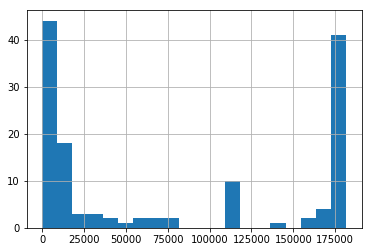

In [4]:
t1 = gtd.count()
pd.Series.hist(t1, bins=20)

### A look at the Dataset
 It is seen that about 47 columns contain information in atleast 85% of the samples.
 About 62 columns contain information in atmost 10% of the samples.
 So a majority of columns/features contain very less information.
 
 I would first look at those columns which have about 90% data.

In [3]:
#Select columns which have atleast 90% of data
t2 = t1[t1 >= np.floor(0.90*r)]
t3 = list(t2.index)
print('There are {} columns with about 90% of data\n'.format(len(t3)), t3)

There are 45 columns with about 90% of data
 ['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']


### Selection of columns to use
I would drop 'eventid', 'country', 'region', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'attacktype1',
'weaptype1', 'targtype1', 'natlty1', 'dbsource', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1_txt'.


In [5]:
#list containing columns to be dropped
drop_lst = ['eventid', 'country', 'region', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'attacktype1',
            'weaptype1', 'targtype1', 'natlty1', 'dbsource', 'targsubtype1', 'targsubtype1_txt', 'target1']

t4 = t3.copy()

for x in drop_lst:
    t4.remove(x)
#print the columns that will be used
print(t4, len(t4), len(t3))

['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1_txt', 'nkill', 'nwound', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'] 29 45


In [6]:
gtd2 = gtd[t4]
print(gtd2.shape)
gtd2.count()

(181691, 29)


iyear              181691
imonth             181691
iday               181691
extended           181691
country_txt        181691
region_txt         181691
vicinity           181691
crit1              181691
crit2              181691
crit3              181691
doubtterr          181690
multiple           181690
success            181691
suicide            181691
attacktype1_txt    181691
targtype1_txt      181691
natlty1_txt        180132
gname              181691
guncertain1        181311
individual         181691
weaptype1_txt      181691
nkill              171378
nwound             165380
property           181691
ishostkid          181513
INT_LOG            181691
INT_IDEO           181691
INT_MISC           181691
INT_ANY            181691
dtype: int64

### There is some data missing in the above selection, those samples will be dropped

In [7]:
gtd3 = gtd2.dropna()
print(gtd3.shape)
gtd3.count()

(162786, 29)


iyear              162786
imonth             162786
iday               162786
extended           162786
country_txt        162786
region_txt         162786
vicinity           162786
crit1              162786
crit2              162786
crit3              162786
doubtterr          162786
multiple           162786
success            162786
suicide            162786
attacktype1_txt    162786
targtype1_txt      162786
natlty1_txt        162786
gname              162786
guncertain1        162786
individual         162786
weaptype1_txt      162786
nkill              162786
nwound             162786
property           162786
ishostkid          162786
INT_LOG            162786
INT_IDEO           162786
INT_MISC           162786
INT_ANY            162786
dtype: int64

In [8]:
print('{:.4f} part of original data will be used.'.format(len(gtd3)/len(gtd)))

0.8959 part of original data will be used.


## 2. Exploring the Data 

 A look at summary of different columns, time evolution of different data worldwide.

In [9]:
data_1 = gtd3.loc[:,['iyear','doubtterr','multiple','success','suicide','individual','nkill','nwound']]
r2, c2 = data_1.shape
data_1.head()

,iyear,doubtterr,multiple,success,suicide,individual,nkill,nwound
0,1970,0.0,0.0,1,0,0,1.0,0.0
1,1970,0.0,0.0,1,0,0,0.0,0.0
2,1970,0.0,0.0,1,0,0,1.0,0.0
5,1970,0.0,0.0,1,0,0,0.0,0.0
6,1970,0.0,0.0,0,0,0,0.0,0.0


### A look into pattern of terrorist incidents over time

Graphs and important Observations are give below.

In [11]:
#Get cumulative data on yearly basis
full_yr_lst=np.zeros([1,c2])
yr_lst = np.array(data_1['iyear'].unique())
yr_lst = np.sort(yr_lst)
for yrs in data_1['iyear'].unique():
    yr_dat = data_1[data_1.iyear == yrs]
    tv1 = np.array(yr_dat.sum())
    tv1[0]=len(yr_dat)
    full_yr_lst = np.vstack((full_yr_lst,tv1))
    
full_yr_lst = np.delete(full_yr_lst, 0, 0)
full_yr_lst = np.hstack((np.reshape(yr_lst,(-1,1)), full_yr_lst))
print(full_yr_lst.shape)

(47, 9)


In [12]:
#Calculate people killed and wounded per incident per year
kipy = full_yr_lst[:,-1]/full_yr_lst[:,1]
wipy = full_yr_lst[:,-2]/full_yr_lst[:,1]

full_yr_lst = np.hstack((full_yr_lst,np.hstack((np.reshape(kipy,(-1,1)),np.reshape(wipy,(-1,1))))))
clms = ['iyear','num incidents','doubtterr','multiple','success','suicide','individual','nkill','nwound','kipy','wipy']
full_yr_df = pd.DataFrame(full_yr_lst, columns=clms)
full_yr_df.head()

,iyear,num incidents,doubtterr,multiple,success,suicide,individual,nkill,nwound,kipy,wipy
0,1970.0,595.0,-88.0,89.0,495.0,0.0,1.0,155.0,212.0,0.356303,0.260504
1,1971.0,326.0,-243.0,26.0,282.0,0.0,2.0,37.0,82.0,0.251534,0.113497
2,1972.0,241.0,-124.0,92.0,135.0,0.0,1.0,193.0,409.0,1.697095,0.800830
3,1973.0,227.0,-373.0,6.0,198.0,0.0,0.0,118.0,493.0,2.171806,0.519824
4,1974.0,313.0,-346.0,11.0,285.0,0.0,2.0,259.0,805.0,2.571885,0.827476


In [13]:
full_yr_df.tail()

,iyear,num incidents,doubtterr,multiple,success,suicide,individual,nkill,nwound,kipy,wipy
42,2013.0,11341.0,1838.0,2221.0,9860.0,600.0,23.0,19892.0,37642.0,3.319108,1.753990
43,2014.0,14792.0,2801.0,2516.0,13019.0,661.0,38.0,27561.0,40970.0,2.769740,1.863237
44,2015.0,13246.0,2367.0,2136.0,11172.0,783.0,46.0,28790.0,43844.0,3.309980,2.173486
45,2016.0,12168.0,2109.0,2038.0,9810.0,849.0,76.0,29234.0,39733.0,3.265368,2.402531
46,2017.0,9721.0,1945.0,1738.0,7666.0,774.0,100.0,23168.0,24771.0,2.548195,2.383294


In [14]:
#number of people killed and injured respectively in all the incidents
print(full_yr_df['nkill'].sum(), full_yr_df['nwound'].sum())

348677.0 518877.0


In [15]:
#Adjust values of 'doubtterr' for plotting purpose
full_yr_df.loc[full_yr_df.doubtterr < 0,'doubtterr'] = -1
full_yr_df.head()

,iyear,num incidents,doubtterr,multiple,success,suicide,individual,nkill,nwound,kipy,wipy
0,1970.0,595.0,-1.0,89.0,495.0,0.0,1.0,155.0,212.0,0.356303,0.260504
1,1971.0,326.0,-1.0,26.0,282.0,0.0,2.0,37.0,82.0,0.251534,0.113497
2,1972.0,241.0,-1.0,92.0,135.0,0.0,1.0,193.0,409.0,1.697095,0.800830
3,1973.0,227.0,-1.0,6.0,198.0,0.0,0.0,118.0,493.0,2.171806,0.519824
4,1974.0,313.0,-1.0,11.0,285.0,0.0,2.0,259.0,805.0,2.571885,0.827476


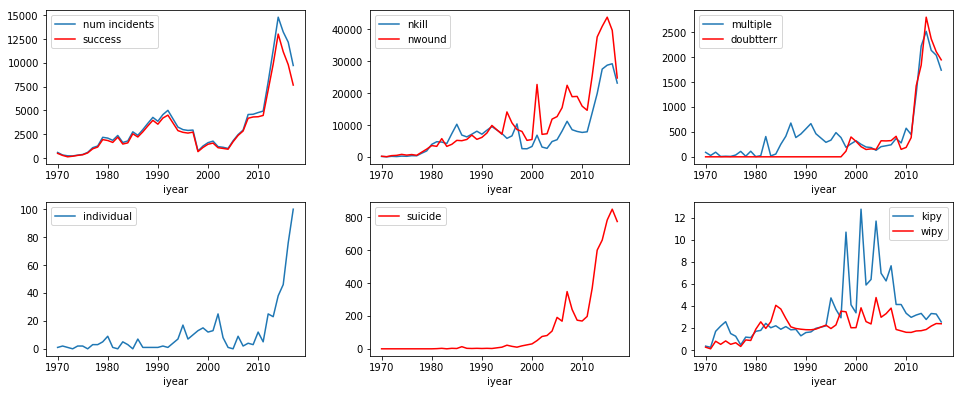

In [16]:
#plot above results
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(231)
ax = plt.gca()
full_yr_df.plot(kind='line',x='iyear',y='num incidents',ax=ax)
full_yr_df.plot(kind='line',x='iyear',y='success',color='red',ax=ax)
plt.subplot(232)
ax = plt.gca()
full_yr_df.plot(kind='line',x='iyear',y='nkill',ax=ax)
full_yr_df.plot(kind='line',x='iyear',y='nwound',color='red',ax=ax)
plt.subplot(233)
ax = plt.gca()
full_yr_df.plot(kind='line',x='iyear',y='multiple',ax=ax)
full_yr_df.plot(kind='line',x='iyear',y='doubtterr',color='red',ax=ax)
plt.subplot(234)
ax = plt.gca()
full_yr_df.plot(kind='line',x='iyear',y='individual',ax=ax)
#full_yr_df.plot(kind='line',x='iyear',y='suicide',color='red',ax=ax)
plt.subplot(235)
ax = plt.gca()
#full_yr_df.plot(kind='line',x='iyear',y='nkill'/'num incidents',ax=ax)
full_yr_df.plot(kind='line',x='iyear',y='suicide',color='red',ax=ax)
plt.subplot(236)
ax = plt.gca()
full_yr_df.plot(kind='line',x='iyear',y='kipy',ax=ax)
full_yr_df.plot(kind='line',x='iyear',y='wipy',color='red',ax=ax)

plt.subplots_adjust(top=1.2,bottom=0,left=0.1,right=2.2,hspace=0.25,wspace=0.25)
plt.show()

### Observations:

-The number of incidents and success in those have increased till 1991, decreased till about 2004, increased rapidly till 2015, then has decreased in 2016 and 2017. People killed and wounded also show similar behaviour. 

-Interestingly, multiple attacks have increased heavily from 2010 which strangely correlates with doubt as to whether the incident is an act of terrorism. 

-Number of unidentified individuals has risen exponentially from 2010.

-Suicide attackers have increased exponentially from 2000.

-Number of people killed per incident has decreased to about 2.5 after seeing levels of 6-12.

-Number of people injured per incident has decreased to about 2.5 from levels of 3.

### Statistics of terrorist incidents

### Summary
(The details are below, only the summary is captured here)

A total of 162786 terrorist incidences have affected 202 countries resulting in 348677 people getting killed and 518877 people getting injured over 47 years. The 5 highest affected countries have suffered 41.4% of all attacks. 54.25% of all incidents have occured in Middle East & North Africa and South Asia Regions. 92.86% of incidents have occured in the mentioned cities. 

88.3% of all incidents are outside the context of legitimate warfare activities. Over 98% of all incidents are aimed at attaining a political, economic, religious, or social goal and have evidence of an intention to coerce, intimidate, or convey some other message to a larger audience. 

About 50% of all incidences are cases of Bombing/Explosion, 23.33% are Armed Assault and about 11% are Assassinations. 23.46% of attacks have been targeted at Private Citizens & Property, 28.65% have been targeted at Military and Police and 23.7% have been targeted at Government and Businessess.

Explosives and Firearms are the main weapons used constituting 83.87% of the attacks. Properties have been damaged in atleast 51.46% of incidences. 

The victims were taken hostage or kidnapped in 6.1% of cases. 
In more than 50% of the cases, the nationality of the perpetrator group or the nationality of the target/victim is unknown.

About 52.58% of all incidents have been attributed to 3346 known terrorist organizations. The sources of the remaining 47.42% of incidences are unknown. (77189-Unknown, 85597-Known)

The above attribution poses a challenge for any classification task as the data is highly unbalanced. I am going to try 2 types of classification: 
1. 2 class classification: incident can be attributed to known organization or not. 
2. Many class classification: to whom the incident can be attributed to among the known incidents. For this purpose, I will use only first 20 terrorist organizations which have considerable amount of data.

In [17]:
data_an = []
for ii in range(len(t4)):
    data_an.append(gtd3[t4[ii]].value_counts())

In [18]:
print(data_an[4].count())#number of countries affected by terrorist incidents
print(data_an[4].head())#5 highest affected countries have suffered 41.4% of all attacks

202
Iraq           23278
Pakistan       13811
India          11460
Afghanistan    11221
Colombia        7673
Name: country_txt, dtype: int64


In [19]:
#monthy distribution of incidents
data_an[1].sort_index(inplace=True)
print(data_an[1][1:])

1     13306
2     12453
3     13500
4     13530
5     14899
6     13793
7     14678
8     14233
9     12843
10    13971
11    13514
12    12057
Name: imonth, dtype: int64


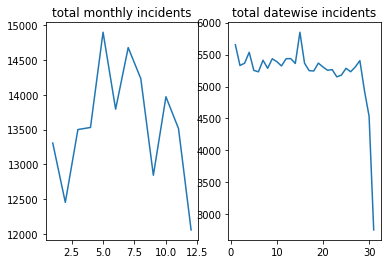

In [20]:
#plot of monthly and datewise distribution of terrorist incidents
plt.figure(1)
plt.subplot(121)
ax=plt.gca()
data_an[1].sort_index(inplace=True)
data_an[1][1:].plot(kind='line', x=data_an[1].index, y=data_an[1].values)
plt.title('total monthly incidents')
plt.subplot(122)
ax=plt.gca()
data_an[2].sort_index(inplace=True)
data_an[2][1:].plot(kind='line', x=data_an[2].index, y=data_an[2].values)
plt.title('total datewise incidents')
plt.show()

In [21]:
print(data_an[3])#about 3.33% of terrorist incidents have gone beyond 1 day

0    157354
1      5432
Name: extended, dtype: int64


In [22]:
print(data_an[5])#Affected Regions

Middle East & North Africa     46177
South Asia                     42141
South America                  17005
Sub-Saharan Africa             14211
Western Europe                 13890
Southeast Asia                 11969
Central America & Caribbean     7822
Eastern Europe                  4834
North America                   3167
East Asia                        747
Central Asia                     551
Australasia & Oceania            272
Name: region_txt, dtype: int64


In [23]:
print(data_an[6])#vicinity of incidents

 0    151179
 1     11574
-9        33
Name: vicinity, dtype: int64


In [24]:
print(data_an[7:10])#critereon of incidents

[1    160848
0      1938
Name: crit1, dtype: int64, 1    161743
0      1043
Name: crit2, dtype: int64, 1    143755
0     19031
Name: crit3, dtype: int64]


In [25]:
print(data_an[14])#type of attack

Bombing/Explosion                      81055
Armed Assault                          37993
Assassination                          17862
Facility/Infrastructure Attack          9564
Hostage Taking (Kidnapping)             7960
Unknown                                 6021
Unarmed Assault                          910
Hostage Taking (Barricade Incident)      836
Hijacking                                585
Name: attacktype1_txt, dtype: int64


In [26]:
print(data_an[15])#target of attack

Private Citizens & Property       38204
Military                          23810
Police                            22842
Government (General)              19966
Business                          18618
Transportation                     6284
Utilities                          5325
Unknown                            4747
Religious Figures/Institutions     4182
Educational Institution            4073
Government (Diplomatic)            3324
Journalists & Media                2668
Terrorists/Non-State Militia       2655
Violent Political Party            1763
Airports & Aircraft                1196
Telecommunication                   930
NGO                                 873
Tourists                            391
Maritime                            284
Food or Water Supply                270
Abortion Related                    259
Other                               122
Name: targtype1_txt, dtype: int64


In [27]:
print(data_an[17].count())#num of terrorist groups
print(data_an[17].head())

3347
Unknown                                        77189
Taliban                                         6652
Islamic State of Iraq and the Levant (ISIL)     4719
Shining Path (SL)                               4001
New People's Army (NPA)                         2653
Name: gname, dtype: int64


In [28]:
print(data_an[18].head())#Uncertainty of perpetrator attribution

0.0    149094
1.0     13692
Name: guncertain1, dtype: int64


In [29]:
print(data_an[20])#weapon used

Explosives                                                                     84923
Firearms                                                                       51607
Unknown                                                                        11963
Incendiary                                                                     10193
Melee                                                                           3344
Chemical                                                                         300
Sabotage Equipment                                                               137
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      132
Other                                                                            109
Fake Weapons                                                                      32
Biological                                                                        32
Radiological                                                     

In [30]:
print(data_an[23])#damage to properties

 1    83772
 0    59963
-9    19051
Name: property, dtype: int64


In [31]:
print(data_an[24])#victims were taken hostages

 0.0    152642
 1.0      9945
-9.0       199
Name: ishostkid, dtype: int64


In [32]:
print(data_an[-4:])#Logistics, Ideology, Miscellaneous and any of these (international)

[-9    85838
 0    70680
 1     6268
Name: INT_LOG, dtype: int64, -9    85838
 0    57463
 1    19485
Name: INT_IDEO, dtype: int64, 0    146493
1     16293
Name: INT_MISC, dtype: int64, -9    78523
 0    53310
 1    30953
Name: INT_ANY, dtype: int64]


### A look at the terrorist organization involved
There are 3346 known terrorist organizations. Many of these have very few incidents attributed to them.

The highest as well as lowest incidents attributed are shown below.

Also the 20 organizations with highest number of terrors incidents attributed to them are shown below.

77189 incidents have not been attributed to any known terrorist organizations.

In [33]:
#list the terrorist organizations
print(data_an[17].sum())
print(data_an[17])#terrorist organizations

162786
Unknown                                                   77189
Taliban                                                    6652
Islamic State of Iraq and the Levant (ISIL)                4719
Shining Path (SL)                                          4001
New People's Army (NPA)                                    2653
Farabundo Marti National Liberation Front (FMLN)           2538
Al-Shabaab                                                 2342
Revolutionary Armed Forces of Colombia (FARC)              2302
Kurdistan Workers' Party (PKK)                             2253
Basque Fatherland and Freedom (ETA)                        1869
Communist Party of India - Maoist (CPI-Maoist)             1822
Boko Haram                                                 1756
Irish Republican Army (IRA)                                1682
Maoists                                                    1545
Liberation Tigers of Tamil Eelam (LTTE)                    1529
National Liberation Army of Colom

In [34]:
#list of 20 organizations with highest number of terrors incidents attributed to them 
print(data_an[17][:20])
print(data_an[17][1:6].sum(), data_an[17][1:11].sum(), data_an[17][1:16].sum(), data_an[17][1:21].sum())
print(data_an[17][1:6].sum()/85597, data_an[17][1:11].sum()/85597, data_an[17][1:16].sum()/85597, data_an[17][1:21].sum()/85597)
print(data_an[17][1:26].sum(), data_an[17][1:31].sum(), data_an[17][1:36].sum(), data_an[17][1:41].sum())
print(data_an[17][1:26].sum()/85597, data_an[17][1:31].sum()/85597, data_an[17][1:36].sum()/85597, data_an[17][1:41].sum()/85597)

Unknown                                             77189
Taliban                                              6652
Islamic State of Iraq and the Levant (ISIL)          4719
Shining Path (SL)                                    4001
New People's Army (NPA)                              2653
Farabundo Marti National Liberation Front (FMLN)     2538
Al-Shabaab                                           2342
Revolutionary Armed Forces of Colombia (FARC)        2302
Kurdistan Workers' Party (PKK)                       2253
Basque Fatherland and Freedom (ETA)                  1869
Communist Party of India - Maoist (CPI-Maoist)       1822
Boko Haram                                           1756
Irish Republican Army (IRA)                          1682
Maoists                                              1545
Liberation Tigers of Tamil Eelam (LTTE)              1529
National Liberation Army of Colombia (ELN)           1478
Tehrik-i-Taliban Pakistan (TTP)                      1303
Palestinians  

### Major terrorist groups and their share of terrorist incidents

In [35]:
gdat = data_an[17][1:21]
print(gdat/85597)
print(gdat.sum())

Taliban                                             0.077713
Islamic State of Iraq and the Levant (ISIL)         0.055130
Shining Path (SL)                                   0.046742
New People's Army (NPA)                             0.030994
Farabundo Marti National Liberation Front (FMLN)    0.029651
Al-Shabaab                                          0.027361
Revolutionary Armed Forces of Colombia (FARC)       0.026893
Kurdistan Workers' Party (PKK)                      0.026321
Basque Fatherland and Freedom (ETA)                 0.021835
Communist Party of India - Maoist (CPI-Maoist)      0.021286
Boko Haram                                          0.020515
Irish Republican Army (IRA)                         0.019650
Maoists                                             0.018050
Liberation Tigers of Tamil Eelam (LTTE)             0.017863
National Liberation Army of Colombia (ELN)          0.017267
Tehrik-i-Taliban Pakistan (TTP)                     0.015222
Palestinians            

In [36]:
gdat_name = list(gdat.index)
print(len(gdat_name), type(gdat_name), gdat_name)

20 <class 'list'> ['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', "New People's Army (NPA)", 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab', 'Revolutionary Armed Forces of Colombia (FARC)', "Kurdistan Workers' Party (PKK)", 'Basque Fatherland and Freedom (ETA)', 'Communist Party of India - Maoist (CPI-Maoist)', 'Boko Haram', 'Irish Republican Army (IRA)', 'Maoists', 'Liberation Tigers of Tamil Eelam (LTTE)', 'National Liberation Army of Colombia (ELN)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Houthi extremists (Ansar Allah)', 'Manuel Rodriguez Patriotic Front (FPMR)']


## 3. Two Class classification

Classification of data into 2 classess: perpetrator known or unknown

### Data preparation
 
 Furthur selection of columns/features to use. Use of Feature Scaling. Use of PCA for dimensionality reduction.
 2 class classification has been implemented without use of PCA as well as with use of PCA. Number of components required to explain more than 90% of variance are selected. 

#### Columns dropped and Reasons for the same
1. eventid, dbsource, specificity, crit1, crit2, crit3, targsubtype1, target1: may not much useful
1. (contd.) natlty1, 
2. iyear: prediction may not work well with future dates
3. imonth, iday, latitude, longitude, country: these have been intentionally dropped to see the working of the model in less     information settings. The inclusion of these will most likely increase the accuracy.
4. provstate, city: after including features in 3. above, these may not be very helpful.

Model with iyear can be used to make better inference about groups responsible for attacks where perpetrator group is unknown.

In [37]:
mlst1 = ['imonth', 'iday', 'extended','region_txt', 'vicinity', 'doubtterr', 'multiple', 'success', 'suicide', 
         'attacktype1_txt','targtype1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1_txt', 'nkill', 'nwound',
         'property', 'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
print(len(mlst1), gtd3.shape)

23 (162786, 29)


In [38]:
keep_lst_1 = ['extended','region_txt', 'vicinity', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1_txt',
              'targtype1_txt', 'individual',  'weaptype1_txt', 'nkill', 'nwound', 'property', 'ishostkid', 'INT_LOG',
              'INT_IDEO', 'INT_MISC', 'INT_ANY']
#categorical Variables for one hot encoding
keep_lst_2 = ['extended','region_txt', 'vicinity', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1_txt',
              'targtype1_txt', 'individual',  'weaptype1_txt', 'property', 'ishostkid', 'INT_LOG',
              'INT_IDEO', 'INT_MISC', 'INT_ANY']

print(len(keep_lst_2))


17


In [39]:
keep_lst_3 = ['extended','region_txt', 'vicinity', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1_txt',
              'targtype1_txt', 'individual',  'weaptype1_txt', 'property', 'ishostkid', 'INT_LOG',
              'INT_IDEO', 'INT_MISC', 'INT_ANY']

In [40]:
#create another column indicating gname is known or unknown
keep_lst_2 = keep_lst_1.copy()
keep_lst_2.append('gname')

In [42]:
ul_data_copy = gtd3[keep_lst_2]
ul_data_copy.loc[:,'gnamecat'] = ul_data_copy.loc[:,'gname']

In [43]:
ul_data_copy.loc[ul_data_copy.gnamecat != 'Unknown', 'gnamecat'] = 1#Known
ul_data_copy.loc[ul_data_copy.gnamecat == 'Unknown', 'gnamecat'] = 0#Unknown

In [44]:
ul_data_copy.head()

,extended,region_txt,vicinity,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,individual,...,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,gname,gnamecat
0,0,Central America & Caribbean,0,0.0,0.0,1,0,Assassination,Private Citizens & Property,0,...,1.0,0.0,0,0.0,0,0,0,0,MANO-D,1
1,0,North America,0,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),0,...,0.0,0.0,0,1.0,0,1,1,1,23rd of September Communist League,1
2,0,Southeast Asia,0,0.0,0.0,1,0,Assassination,Journalists & Media,0,...,1.0,0.0,0,0.0,-9,-9,1,1,Unknown,0
5,0,North America,0,0.0,0.0,1,0,Armed Assault,Police,0,...,0.0,0.0,1,0.0,-9,-9,0,-9,Black Nationalists,1
6,0,South America,0,0.0,0.0,0,0,Assassination,Police,0,...,0.0,0.0,0,0.0,0,0,0,0,Tupamaros (Uruguay),1


In [45]:
ul_data_copy.shape

(162786, 21)

In [46]:
#import required libs
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [48]:
#log transform numerical data - Unsupervised Learning
ul_data = gtd3[keep_lst_1]
ul_data.shape
ul_data.loc[:,'nkill'] = ul_data.loc[:,'nkill'].apply(lambda x: np.log(x + 1))
ul_data.loc[:,'nwound'] = ul_data.loc[:,'nwound'].apply(lambda x: np.log(x + 1))
ul_data.shape

(162786, 19)

In [49]:
#Data Preprocessing - one hot encoding categorical data
ul_data_final = pd.get_dummies(ul_data, prefix=keep_lst_3, columns=keep_lst_3)


In [50]:
print("There are {} total features after one-hot encoding.".format(len(list(ul_data_final.columns))))
#print(ul_data_final.columns)

There are 90 total features after one-hot encoding.


### Feature Transformation
Using PCA to reduce the number of features used for learning process.
A plot of number of features vs explained variance is shown.
It shows that about 50 features are required to fully represent the given features.
About 25 features represents > 90% of the variance in the data.

Text(0.5, 0, 'cumulative explained variance')

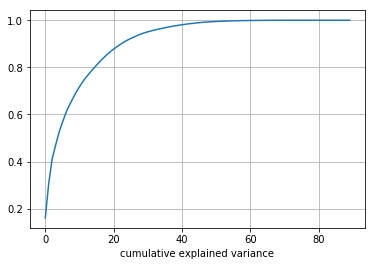

In [51]:
#Choosing number of components
pca = PCA().fit(ul_data_final)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.xlabel('cumulative explained variance')

In [52]:
pca = PCA(n_components=25)
pca.fit(ul_data_final)
explained_var = pca.explained_variance_ratio_
print(explained_var, explained_var.sum())

[0.16091805 0.14620176 0.10411591 0.05747785 0.05411235 0.04317623
 0.04038615 0.0317351  0.02840829 0.02706804 0.02432165 0.02193538
 0.01922344 0.01744871 0.01697447 0.01624598 0.01541557 0.01470379
 0.01364381 0.01301059 0.01098241 0.0105517  0.00989901 0.00939456
 0.00816473] 0.9155155497189894


### 25 components explain 91.55% of the variance in the data

In [53]:
#Use all(90) features to classify known and Unknown sources of incidents
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
from time import time

#Train Test data split
X_train, X_test, y_train, y_test = train_test_split(ul_data_final, ul_data_copy.gnamecat, 
                                                    test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 130228 samples.
Testing set has 32558 samples.


In [54]:
#function for plotting confusion matrix
def plot_cm(cm):
    lbl_1 = ['Unknown', 'Known']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + lbl_1)
    ax.set_yticklabels([''] + lbl_1)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [58]:
#function for learning and performance monitering
def train_predict(learner, X_train, y_train, X_test, y_test): 
    results = {}
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    results['train_time'] = end - start
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    results['pred_time'] = end - start
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    cm = confusion_matrix(y_test,predictions_test)
    print(cm)
    plot_cm(cm)
    print("{} trained on {} samples.".format(learner.__class__.__name__, len(y_train)))
    return results

### Classification Using all features of the data

[[15332    88]
 [ 1523 15615]]


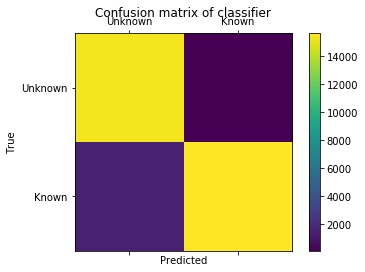

LogisticRegression trained on 130228 samples.


In [59]:
from sklearn.linear_model import LogisticRegression

clf_A = LogisticRegression(random_state=59, solver='liblinear')
results = train_predict(clf_A, X_train, y_train, X_test, y_test)

In [60]:
print(results)

{'train_time': 3.5587730407714844, 'pred_time': 0.017056941986083984, 'acc_test': 0.9505190736531728, 'f_test': 0.9765478424015009}


### Classification Using 25 features obtained through PCA

Same analysis as above is performed using lesser number of features(obtained through PCA)

[[15399    21]
 [ 1642 15496]]


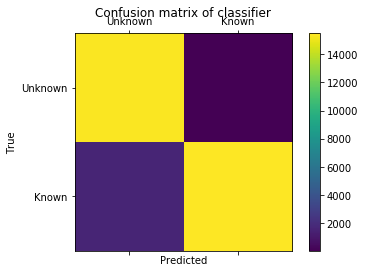

LogisticRegression trained on 130228 samples.
{'train_time': 1.978545904159546, 'pred_time': 0.0020062923431396484, 'acc_test': 0.9489219239511026, 'f_test': 0.9782087215614979}


In [61]:
#Use 25 features to classify known and Unknown sources of incidents
Xtrain = pca.fit_transform(X_train)
Xtest = pca.transform(X_test)

results = train_predict(clf_A, Xtrain, y_train, Xtest, y_test)
print(results)

### Summary of 2 class classification

2 class classification using lesser number of features performs about the same as that with all features, but traning time is reduced to about 58% of that when using all features.

The accuracy is about 94.89% with f1 score = 97.82% when 25 features are used.

## 4. Multiclass classification

Multiclass classification is performed using Neural networks. 20 classess with highest data are selected.
Same procedure as used previously is adopted.

In [62]:
#Supervised Learning data
sl_data_copy = gtd3[keep_lst_2]
sl_data_copy.shape

(162786, 20)

In [63]:
sl_data_copy = sl_data_copy.loc[sl_data_copy.gname.isin(gdat_name), :]
sl_data_copy.shape#shape of the dataset being used

(43895, 20)

In [64]:
sl_data_copy.head()#A look at top 5 rows

,extended,region_txt,vicinity,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,individual,weaptype1_txt,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,gname
39,0,Southeast Asia,0,1.0,0.0,0,0,Unknown,Military,0,Unknown,0.0,1.0,0,0.0,0,1,1,1,New People's Army (NPA)
169,0,Southeast Asia,1,1.0,0.0,1,0,Unknown,Military,0,Unknown,2.0,0.0,0,0.0,0,1,1,1,New People's Army (NPA)
226,0,Middle East & North Africa,0,0.0,0.0,1,0,Bombing/Explosion,Airports & Aircraft,0,Explosives,0.0,0.0,1,0.0,1,0,1,1,Palestinians
253,0,South America,0,0.0,0.0,1,0,Assassination,Government (Diplomatic),0,Firearms,1.0,1.0,0,0.0,1,0,1,1,Palestinians
487,1,Middle East & North Africa,0,1.0,0.0,1,0,Hostage Taking (Kidnapping),Military,0,Unknown,0.0,0.0,0,1.0,1,1,1,1,Palestinians


In [65]:
#log transform numerical data
sl_data_copy.loc[:,'nkill'] = sl_data_copy.loc[:,'nkill'].apply(lambda x: np.log(x + 1))
sl_data_copy.loc[:,'nwound'] = sl_data_copy.loc[:,'nwound'].apply(lambda x: np.log(x + 1))

In [66]:
#save gname in a new variable and drop it from the dataset 
gname_cat = sl_data_copy.gname
sl_data_copy = sl_data_copy.drop('gname', axis=1)

In [67]:
print(sl_data_copy.shape)
sl_data_copy.head()

(43895, 19)


,extended,region_txt,vicinity,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,individual,weaptype1_txt,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
39,0,Southeast Asia,0,1.0,0.0,0,0,Unknown,Military,0,Unknown,0.000000,0.693147,0,0.0,0,1,1,1
169,0,Southeast Asia,1,1.0,0.0,1,0,Unknown,Military,0,Unknown,1.098612,0.000000,0,0.0,0,1,1,1
226,0,Middle East & North Africa,0,0.0,0.0,1,0,Bombing/Explosion,Airports & Aircraft,0,Explosives,0.000000,0.000000,1,0.0,1,0,1,1
253,0,South America,0,0.0,0.0,1,0,Assassination,Government (Diplomatic),0,Firearms,0.693147,0.693147,0,0.0,1,0,1,1
487,1,Middle East & North Africa,0,1.0,0.0,1,0,Hostage Taking (Kidnapping),Military,0,Unknown,0.000000,0.000000,0,1.0,1,1,1,1


In [68]:
#Data Preprocessing - one hot encoding categorical data
sl_data_final = pd.get_dummies(sl_data_copy, prefix=keep_lst_3, columns=keep_lst_3)

In [69]:
gn_lst = list(gname_cat.unique())#names of the terrorist organizations

In [70]:
#one hot encode output classess
gname_cat_op = pd.get_dummies(gname_cat, columns=gn_lst)
gname_cat_op.shape

(43895, 20)

In [71]:
gname_lst_ohe = list(gname_cat_op.columns)#one hot encoded
print(gname_lst_ohe)

['Al-Qaida in the Arabian Peninsula (AQAP)', 'Al-Shabaab', 'Basque Fatherland and Freedom (ETA)', 'Boko Haram', 'Communist Party of India - Maoist (CPI-Maoist)', 'Farabundo Marti National Liberation Front (FMLN)', 'Houthi extremists (Ansar Allah)', 'Irish Republican Army (IRA)', 'Islamic State of Iraq and the Levant (ISIL)', "Kurdistan Workers' Party (PKK)", 'Liberation Tigers of Tamil Eelam (LTTE)', 'Manuel Rodriguez Patriotic Front (FPMR)', 'Maoists', 'National Liberation Army of Colombia (ELN)', "New People's Army (NPA)", 'Palestinians', 'Revolutionary Armed Forces of Colombia (FARC)', 'Shining Path (SL)', 'Taliban', 'Tehrik-i-Taliban Pakistan (TTP)']


In [72]:
gname_cat_op.head()

,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Basque Fatherland and Freedom (ETA),Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Farabundo Marti National Liberation Front (FMLN),Houthi extremists (Ansar Allah),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Liberation Tigers of Tamil Eelam (LTTE),Manuel Rodriguez Patriotic Front (FPMR),Maoists,National Liberation Army of Colombia (ELN),New People's Army (NPA),Palestinians,Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Taliban,Tehrik-i-Taliban Pakistan (TTP)
39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [73]:
print("There are {} total features after one-hot encoding.".format(len(list(sl_data_final.columns))))
#print(sl_data_final.columns)

There are 86 total features after one-hot encoding.


In [74]:
#Train Test data split
X_train, X_test, y_train, y_test = train_test_split(sl_data_final, gname_cat_op, 
                                                    test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 35116 samples.
Testing set has 8779 samples.


In [75]:
#create train validation split
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("Training set has {} samples.".format(X_train_.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))

Training set has 28092 samples.
Validation set has 7024 samples.


In [76]:
#Neural Network for 20 class classification using all features
#model creation
from keras.models import Sequential
from keras.layers import Dropout, Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(86,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(20, activation='softmax'))#num of classess
          
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1300      
Total params: 11,028
Trainable params: 11,028
Non-trainable params: 0
_________________________________________________________________


In [77]:
#Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
from keras.callbacks import ModelCheckpoint  

epochs = 30
#save best weights
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
start = time()
model.fit(X_train_, y_train_, validation_data=(X_val, y_val),
          epochs=epochs, batch_size=256, callbacks=[checkpointer], verbose=2)
stop = time()

Train on 28092 samples, validate on 7024 samples
Epoch 1/30
 - 9s - loss: 1.9577 - acc: 0.4527 - val_loss: 1.0590 - val_acc: 0.6862

Epoch 00001: val_loss improved from inf to 1.05896, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/30
 - 0s - loss: 0.9868 - acc: 0.6721 - val_loss: 0.7045 - val_acc: 0.7191

Epoch 00002: val_loss improved from 1.05896 to 0.70450, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/30
 - 1s - loss: 0.7646 - acc: 0.7046 - val_loss: 0.6503 - val_acc: 0.7412

Epoch 00003: val_loss improved from 0.70450 to 0.65028, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/30
 - 1s - loss: 0.7035 - acc: 0.7222 - val_loss: 0.6332 - val_acc: 0.7435

Epoch 00004: val_loss improved from 0.65028 to 0.63324, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 5/30
 - 0s - loss: 0.6781 - acc: 0.7301 - val_loss: 0.6147 - val_acc: 0.7528

Epoch 00005: val_loss improved from 0.63324 to 0.61474, saving model to

In [81]:
print('time taken = {:.4f} second'.format(stop-start))
#Load the Model with the Best Validation Loss
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

time taken = 24.1804 second


In [82]:
#get accuracy for test data
from sklearn.metrics import classification_report

Y_test = np.argmax(np.array(y_test), axis=1)
gname_predictions = model.predict_classes(X_test)
print(classification_report(Y_test, gname_predictions, target_names=gname_lst_ohe))


                                                  precision    recall  f1-score   support

        Al-Qaida in the Arabian Peninsula (AQAP)       0.71      0.43      0.54       184
                                      Al-Shabaab       0.85      0.84      0.84       461
             Basque Fatherland and Freedom (ETA)       0.98      0.97      0.98       376
                                      Boko Haram       0.81      0.81      0.81       372
  Communist Party of India - Maoist (CPI-Maoist)       0.61      0.52      0.56       364
Farabundo Marti National Liberation Front (FMLN)       1.00      1.00      1.00       534
                 Houthi extremists (Ansar Allah)       0.75      0.66      0.70       166
                     Irish Republican Army (IRA)       0.93      0.96      0.95       327
     Islamic State of Iraq and the Levant (ISIL)       0.87      0.96      0.92       916
                  Kurdistan Workers' Party (PKK)       0.85      0.88      0.87       457
         

### Feature Transformation for Neural netwok
Using PCA to reduce the number of features used for learning process.
A plot of number of faetures vs explained variance is shown.
It shows that about 50 features are required to fully represent the given features.
About 25 features represents > 90% of the variance in the data.

Text(0.5, 0, 'cumulative explained variance')

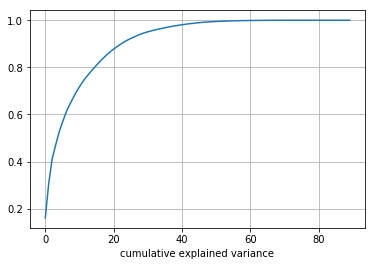

In [83]:
#Choosing number of components
pca = PCA().fit(ul_data_final)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.xlabel('cumulative explained variance')

In [84]:
pca = PCA(n_components=25)
pca.fit(ul_data_final)
explained_var = pca.explained_variance_ratio_
print(explained_var, explained_var.sum())

[0.16091805 0.14620176 0.10411591 0.05747785 0.05411235 0.04317623
 0.04038615 0.0317351  0.02840829 0.02706804 0.02432165 0.02193538
 0.01922345 0.01744871 0.01697447 0.01624599 0.01541558 0.01470379
 0.01364382 0.01301057 0.01098251 0.01055171 0.00989921 0.00939529
 0.00816586] 0.9155177139576216


### Using 25 features obtained through PCA for 20 class classification

In [85]:
#Use 25 features to classify 20 groups

Xtrain_rd = pca.fit_transform(X_train_)
Xval_rd = pca.transform(X_val)
Xtest_rd = pca.transform(X_test)

In [86]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_shape=(25,)))
model2.add(Dropout(0.2))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
          
model2.add(Dense(20, activation='softmax'))#num of classess
          
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1664      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1300      
Total params: 7,124
Trainable params: 7,124
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Compile the model
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
epochs = 30

#save best weights
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_pca.hdf5', 
                               verbose=1, save_best_only=True)
start = time()
model2.fit(Xtrain_rd, y_train_, validation_data=(Xval_rd, y_val),
          epochs=epochs, batch_size=256, callbacks=[checkpointer], verbose=2)
stop = time()

Train on 28092 samples, validate on 7024 samples
Epoch 1/30
 - 1s - loss: 2.0635 - acc: 0.4467 - val_loss: 1.1685 - val_acc: 0.6774

Epoch 00001: val_loss improved from inf to 1.16850, saving model to saved_models/weights.best.from_scratch_pca.hdf5
Epoch 2/30
 - 0s - loss: 0.9985 - acc: 0.6739 - val_loss: 0.7249 - val_acc: 0.7252

Epoch 00002: val_loss improved from 1.16850 to 0.72490, saving model to saved_models/weights.best.from_scratch_pca.hdf5
Epoch 3/30
 - 0s - loss: 0.7843 - acc: 0.7021 - val_loss: 0.6624 - val_acc: 0.7420

Epoch 00003: val_loss improved from 0.72490 to 0.66243, saving model to saved_models/weights.best.from_scratch_pca.hdf5
Epoch 4/30
 - 0s - loss: 0.7244 - acc: 0.7136 - val_loss: 0.6441 - val_acc: 0.7484

Epoch 00004: val_loss improved from 0.66243 to 0.64407, saving model to saved_models/weights.best.from_scratch_pca.hdf5
Epoch 5/30
 - 0s - loss: 0.6974 - acc: 0.7228 - val_loss: 0.6335 - val_acc: 0.7466

Epoch 00005: val_loss improved from 0.64407 to 0.63353,

In [89]:
print('time taken = {:.4f} second'.format(stop-start))

time taken = 14.6705 second


In [91]:
#Load the Model with the Best Validation Loss
model2.load_weights('saved_models/weights.best.from_scratch_pca.hdf5')

gname_predictions_2 = model2.predict_classes(Xtest_rd)
print(classification_report(Y_test, gname_predictions_2, target_names=gname_lst_ohe))

                                                  precision    recall  f1-score   support

        Al-Qaida in the Arabian Peninsula (AQAP)       0.74      0.35      0.47       184
                                      Al-Shabaab       0.79      0.89      0.83       461
             Basque Fatherland and Freedom (ETA)       0.98      0.98      0.98       376
                                      Boko Haram       0.84      0.72      0.77       372
  Communist Party of India - Maoist (CPI-Maoist)       0.55      0.42      0.48       364
Farabundo Marti National Liberation Front (FMLN)       1.00      1.00      1.00       534
                 Houthi extremists (Ansar Allah)       0.80      0.61      0.69       166
                     Irish Republican Army (IRA)       0.96      0.95      0.96       327
     Islamic State of Iraq and the Levant (ISIL)       0.86      0.97      0.91       916
                  Kurdistan Workers' Party (PKK)       0.84      0.91      0.87       457
         

### Summary of Multiclass Classification

The performance of 20-class classification with redused number of features is marginally worse compared to that using all features. But again the savings is in time.

There are 4 classess with perfect scores, 2 classess with precision and f-score > 0.9.
There are 4 classess with below average results. It is to be noted that these are the classess with lowest data.

### A final word

(GTD Cookbook has been used for reference with respect to information contained in GTD dataset.)

Some additional analysis which when performed will improve the results considerably:
1. Testing different ML models
2. Use of more/additional feature(among dropped features)
3. Model to classify more terrorist groups